### **Trabajo Práctico Nº2**
### *Método del Gradiente Conjugado*

In [9]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

**Ejercicio 1**

In [10]:
def métodoDescenso (A, b, x0, N = 1):
  e = np.empty((0,1),float)
  for i in range(N):
    r = b - A@x0
    a = (np.transpose(r)@r) / (np.transpose(r)@A@r)
    x0 = x0 + r@a
    e = np.append(e, [[np.linalg.norm(b - A@x0, 2)]],axis=0)

  return (x0, e)

**Ejercicio 2**

In [11]:
def gráficoErroresD(e):
  plt.figure(figsize=(50,10))
  plt.title('Errores Método del Descenso')
  plt.xlabel('Pasos')
  plt.xticks(range(e.shape[0]))
  plt.ylabel('Errores')
  plt.grid()

  plt.plot(e, 'rD-.')

  plt.axhline(0, color='m', xmax=1) #marca la recta 0 para poder visualizar mejor la convergencia

  plt.show()

**Ejercicio 3**

In [12]:
def GramSchmidt(d, v, A):
  u = v
  for i in range(len(d)):
    u = u - ((np.transpose(v)@A@d[i]) / (np.transpose(d[i])@A@d[i]))*d[i]
  
  return(u)

**Ejercicio 4**

In [13]:
def métodoGradienteConjugado(A, b, x0, n):
  x = x0
  d = []
  e = np.empty((0,1),float)
  for i in range(n):
    r = b - A@x
    r2 = GramSchmidt(d, r, A)
    a = (np.transpose(r2)@r) / (np.transpose(r2)@A@r2)
    x = x + r2@a
    d = d + [r2]
    e = np.append(e, [[np.linalg.norm(b - A@x, 2)]],axis=0)

  return(x, e)

**Ejercicio 5**

In [14]:
def gráficoErroresGC(e):
  plt.figure(figsize=(50,10))
  plt.title('Errores Método del Gradiente Conjugado')
  plt.xlabel('Pasos')
  plt.xticks(range(e.shape[0]))
  plt.ylabel('Errores')
  plt.grid()

  plt.plot(e, 'bp-')

  plt.axhline(0, color='m', xmax=1) 

  plt.show()

**Comparación de los Métodos del Descenso y el Gradiente Conjugado**

Empecemos por resolver un sistema $Ax=b$, $A$ real, simétrica y definida positiva, aplicando ambos métodos.

In [15]:
M = np.random.rand(10,10)
A = np.transpose(M)@M + np.eye(10)
b = np.random.rand(10,1)
x0= np.random.rand(10,1)

mD = métodoDescenso(A, b, x0, 20)
mGC = métodoGradienteConjugado(A, b, x0, 20)

Grafiquemos ahora el error en el resultado en cada paso de los métodos para comparar su convergencia.

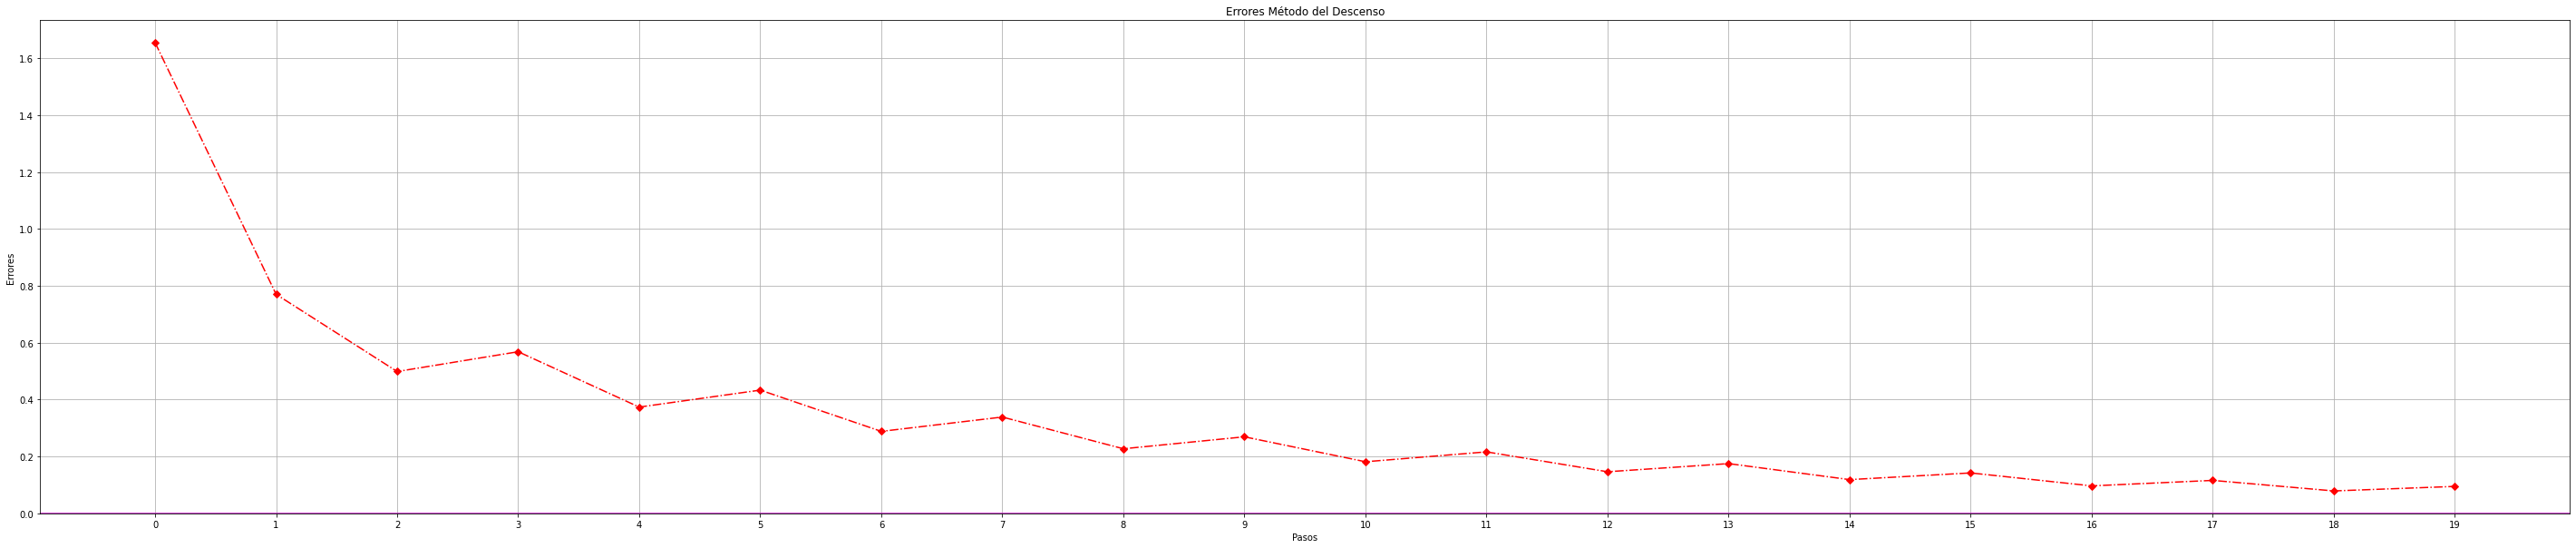

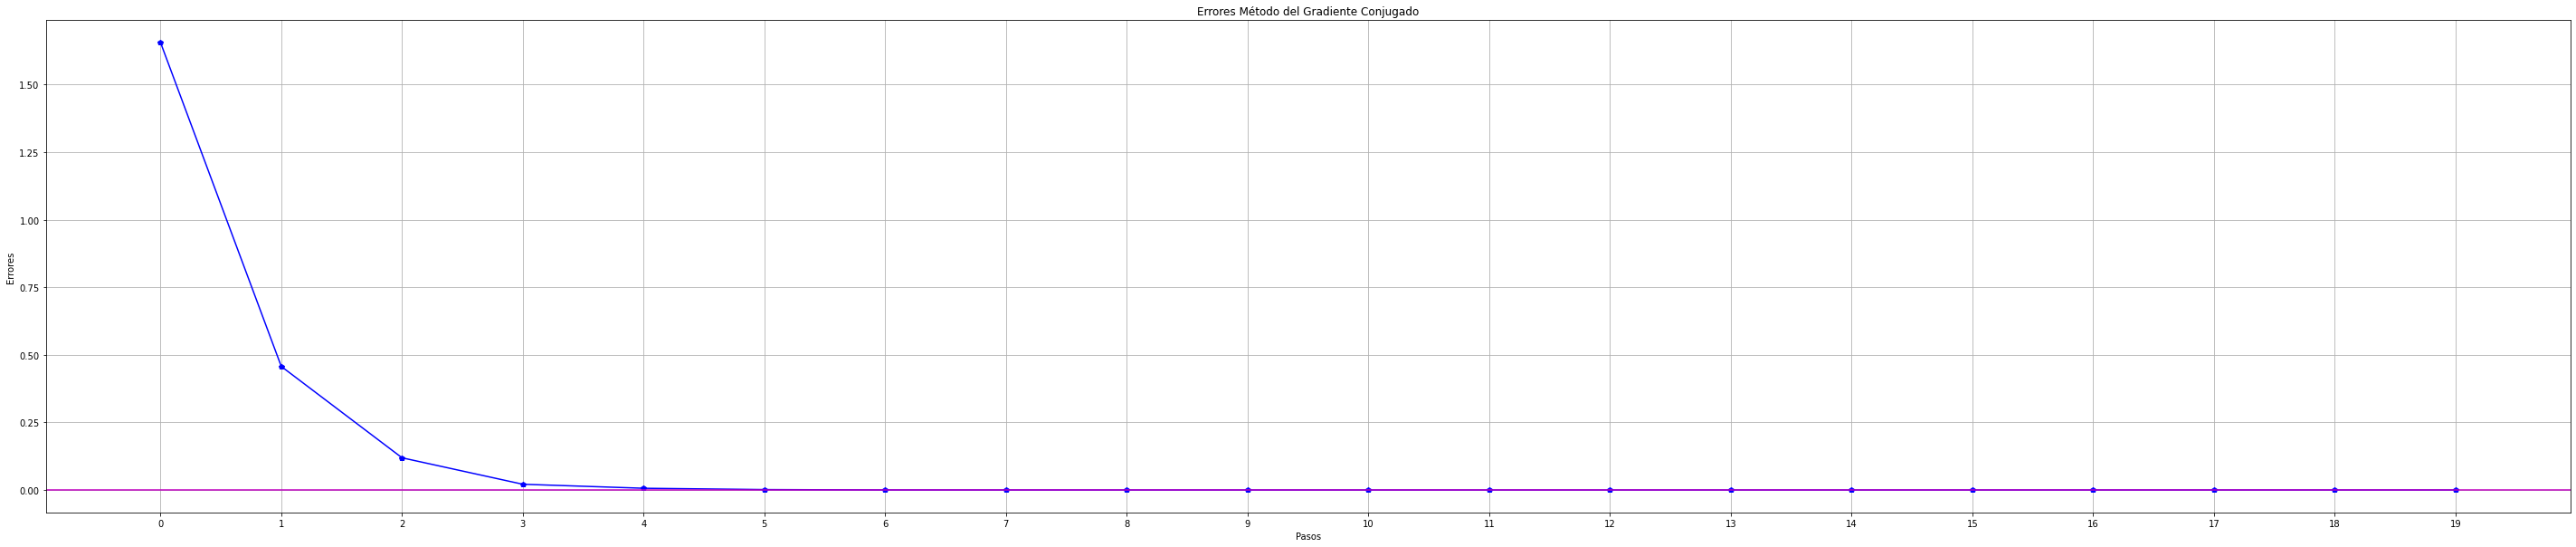

In [16]:
gráficoErroresD(mD[1])
gráficoErroresGC(mGC[1])

En base a los resultados obtenidos, puede verse que el método más apropiado para resolver un sistema de ecuaciones lineales es el método del gradiente conjugado, ya que además de que garantiza su convergencia, lo hace muy rápidamente.